#### Jérémy TREMBLAY

# TP7: Neural Network - Part 2

In [17]:
# Import the libraries that will be used in this notebook.
import os
import numpy as np
import seaborn as sns

# Import the pyplot module from matplotlib with the plt alias.
import matplotlib.pyplot as plt

# Other.
from keras.models import Sequential, load_model
from keras.layers import Input, Dense, Flatten, Dropout
from tensorflow import keras
from sklearn.metrics import confusion_matrix

## Task 7: Load and normalize data

**Consigne :** : Proposez une normalisation des données par la valeur maximale d’une images 8 bits, soit 255 afin que chaque valeur de pixel soit € [0, 1]. Cette normalisation doit être faites sur les deux ensembles d’entrées : apprentissage et validation.

First, let's load the data.

In [2]:
# Load numbers.
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
x_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

The problem here is that the values are not normalized (between 1 and 255 because of the pixel colors).

Let's normalize the data now.

In [4]:
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0

Let's see here.

In [5]:
x_test_normalized[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

It's better now, just black or white. For the fun, we are going to display the number to see data.

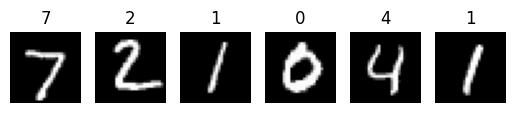

In [6]:
nimages = 6
fig, axs = plt.subplots(1, nimages)
for i in range(nimages):
    label = y_test[i]
    image = x_test_normalized[i]
    pixels = image.reshape((28, 28))
    axs[i].imshow(pixels, cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(label)
plt.show()

## Task 8: Create a `get_model` function

**Consigne :** Créer maintenant une fonction `get_model_mnist` qui prend en paramètre la géométrie des données de celui-ci et retourne un modèle.
* Ce modèle sera de type `Sequential` (voir `keras.models`).
* Il sera composé d’un layer `Input` qui prendra en paramètre la géométrie des données d’entrée, ici 28 x 28.
* D’un layer `Flatten` qui permet l’aplatissement des données en un vecteur afin de pouvoir connecter correctement nos couches suivantes.
* Puis, de deux layers `Dense`, tous deux composés de fonctions d’activation de type `ReLu` et respectivement 128 et 32 neurones.
* Enfin, un dernier layer de type `Dense` avec un nombre de neurones correspondant au nombre de classes à prédire. Il s’agira du layer de sortie.  

Indications :
* Dans le cadre de la classification multi-classe, il faudra utiliser une fonction d’activation de type `Softmax` pour émettre un vecteur de probabilité.
* La liste des layers disponibles est présente dans le module `keras.layers`.

In [7]:
def get_model_mnist(input_shape=(28, 28)):
    """
    Creates a Sequential model for classifying hand-written digits using the MNIST dataset.

    Parameters:
    - input_shape (tuple): The shape of input images (default is (28, 28)).

    Returns:
    - model (Sequential): The compiled Keras Sequential model.
    """
    model = Sequential()

    # Add input, internal and output layers.
    model.add(Input(shape=input_shape))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(32, activation='relu'))

    # Add output layer with softmax activation for multi-class classification.
    num_classes = 10  # Number of classes (digits 0-9)
    model.add(Dense(num_classes, activation='softmax'))

    return model

We can now create our model with this function.

In [8]:
# Create the model based on the input shape of MNIST images.
model_mnist = get_model_mnist()

# Display the summary of the model.
model_mnist.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Task 9: Parameterization of the model and data visualization

**Consigne :** Proposez un apprentissage de votre modèle à l’aide de sa fonction `fit`, puis observez les résultats. Il vous faudra pour la suite stocker le retour de cette fonction dans une variable, par exemple `history`. Vous allez pouvoir lui fournir les informations suivantes :
* Les données d’entrée de la base d’apprentissage et les prédictions attendues.
* Un nombre d’époque à 20.
* Un batch de taille 512.
* Des données de validation (`validation_data`) qui seront les données de test.
* Une fonction *callback* de sauvegarde spécifique au modèle.  

Voici un exemple de prédictions erronées sur la base de test par le modèle actuellement :
6 (true: 5) 2 (true: 8) 9 (true: 0) 8 (true: 4) 6 (true: 4) 0 (true: 6)  

Il est possible pour analyser ces erreurs de dresser la matrice de confusion sur les 10 classes à prédire. Pour cela nous allons utiliser les librairies `scikit-learn` et `seaborn`.

*Note :* les prédictions en sortie du modèle sont des probabilités d’appartenance de classe. Il est possible à l’aide de la fonction `argmax` de `numpy` de récupérer l’indice (classe) avec la plus grande probabilité.

In [21]:
# Compile the model.
model_mnist.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define and configure the model checkpoint callback.
model_folder = 'models/mnist/best_model.h5'
os.makedirs('models/mnist', exist_ok=True)
save_callback = keras.callbacks.ModelCheckpoint(filepath=model_folder, verbose=0, save_best_only=True)

# Train.
history = model_mnist.fit(x_train_normalized, y_train, epochs=20, batch_size=512, validation_data=(x_test_normalized, y_test), callbacks=[save_callback])

# Make predictions on the test set.
y_predictions = model_mnist.predict(x_test)
y_predictions = np.argmax(y_predictions, axis=1)

Epoch 1/20
118/118 [==============================] - 8s 36ms/step - loss: 0.6303 - accuracy: 0.7947 - val_loss: 0.1829 - val_accuracy: 0.9491


C:\Users\jtrem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/20
118/118 [==============================] - 2s 17ms/step - loss: 0.1422 - accuracy: 0.9609 - val_loss: 0.1254 - val_accuracy: 0.9646
Epoch 3/20
118/118 [==============================] - 2s 18ms/step - loss: 0.0994 - accuracy: 0.9726 - val_loss: 0.0995 - val_accuracy: 0.9713
Epoch 4/20
118/118 [==============================] - 4s 30ms/step - loss: 0.0764 - accuracy: 0.9787 - val_loss: 0.0871 - val_accuracy: 0.9741
Epoch 5/20
118/118 [==============================] - 3s 22ms/step - loss: 0.0617 - accuracy: 0.9827 - val_loss: 0.0788 - val_accuracy: 0.9759
Epoch 6/20
118/118 [==============================] - 3s 26ms/step - loss: 0.0511 - accuracy: 0.9857 - val_loss: 0.0750 - val_accuracy: 0.9776
Epoch 7/20
118/118 [==============================] - 4s 35ms/step - loss: 0.0428 - accuracy: 0.9882 - val_loss: 0.0739 - val_accuracy: 0.9777
Epoch 8/20
118/118 [==============================] - 3s 21ms/step - loss: 0.0369 - accuracy: 0.9898 - val_loss: 0.0687 - val_accuracy: 0.9788

Now let's analyze a few images where our model has made some mistakes.

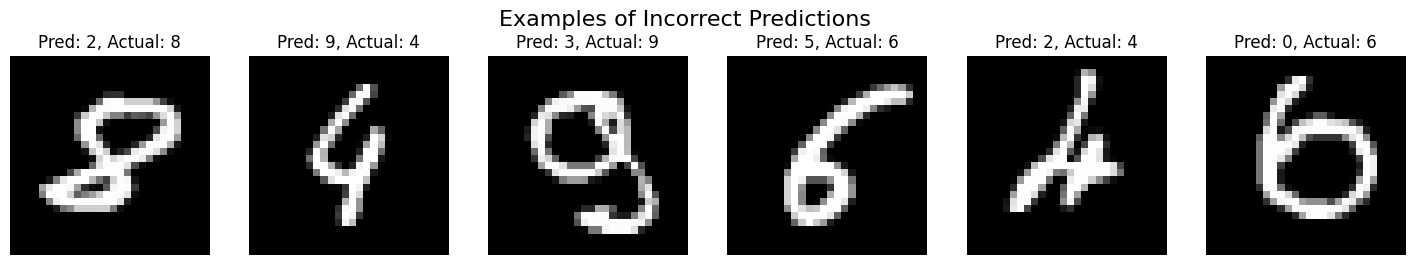

In [22]:
# Only get 6 incorrect preditions.
incorrect_predictions = np.where(y_predictions != y_test)[0][:6]

fig, axs = plt.subplots(1, 6, figsize=(18, 3))
fig.suptitle('Examples of Incorrect Predictions', fontsize=16)

for i, idx in enumerate(incorrect_predictions):
    # Original image.
    axs[i].imshow(x_test[idx], cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(f"Pred: {y_predictions[idx]}, Actual: {y_test[idx]}")

plt.show()

We cannot blame it because some numbers are very hard to decrypt, let's seee more precisely where our model fails, on which numbers, by displaying the confusion matrix.

<Axes: >

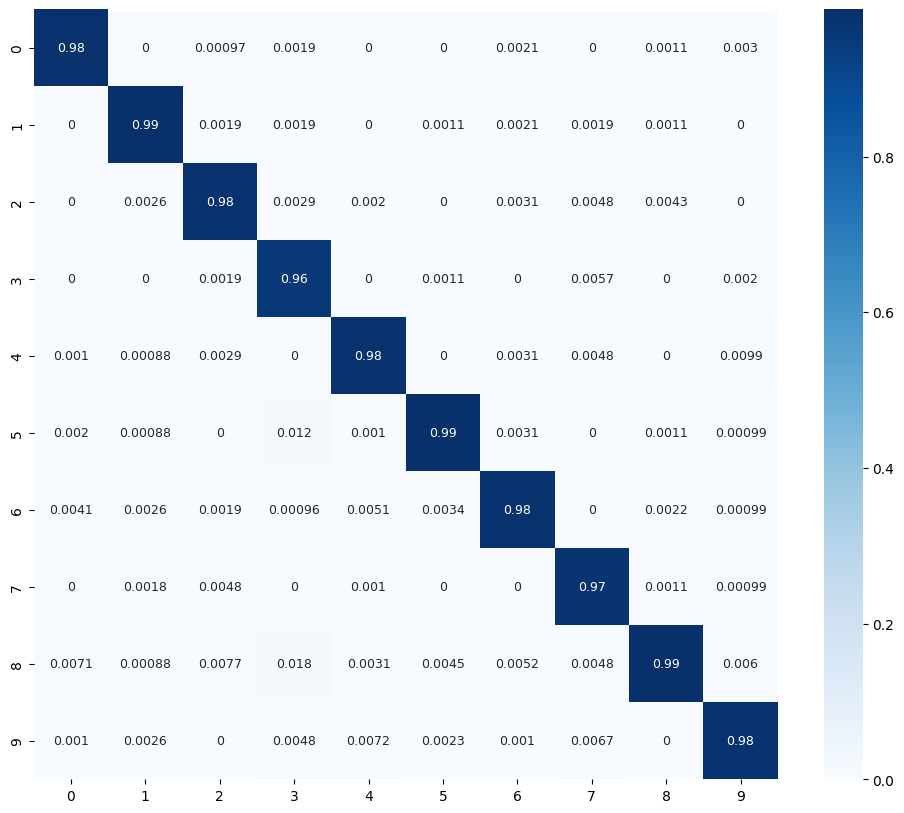

In [23]:
# Display the confusion matrix.
conf_matrix = confusion_matrix(y_test, y_predictions, normalize='pred')
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, annot_kws={"fontsize": 9}, cmap="Blues", ax=ax)

Here if we want, we can compare each number to see where our model fails, which numbers he confuses with others. For example here, we can see that our model always made some mistakes with the 6 digit. It ofter confuses it with the 0 digit or with the 5 digit and it seems logical, there are digits that are very similar and sometimes, we also made some mistkaes when we read them.
Overall it is a good performance since each digit is predicted with at least 96% of the time.

## Task 10: Create a new version of our model

**Consigne :** : À partir de l’analyse des courbes d’apprentissage et de validation de notre modèle actuel, il est possible de visualiser que les tendances entre les deux courbes au cours de l’apprentissage ne sont pas les mêmes. Nous allons proposer une seconde version de notre modèle :  
* La structure du modèle restera dans l’ensemble la même. Toutefois, une couche de `Dropout` sera ajoutée à la suite de chacune des couches cachées de notre réseau.
* Pour rappel, le `Dropout` permet lors de la backprogation d’éviter de mettre à jour tous les poids de notre réseau. Pour cela, il faut définir un pourcentage (p € [0, 1]) de poids choisis aléatoirement à chaque rétropropagation de l’erreur et qui ne sont pas mis à jour.

Let's define our new model function.

In [18]:
# The same model as previous but with dropout.
def get_model_mnist_dropout(input_shape=(28, 28), dropout_rate=0.3):
    model = Sequential()

    # Add input, internal, and output layers.
    model.add(Input(shape=input_shape))
    model.add(Flatten())
    
    # First hidden layer with Dropout.
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dropout_rate))
    
    # Second hidden layer with Dropout.
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(dropout_rate))

    # Output layer with softmax activation for multi-class classification.
    num_classes = 10  # Number of classes (digits 0-9)
    model.add(Dense(num_classes, activation='softmax'))

    return model

Now let's use it to determine the best dropout value possible.

In [24]:
# Define the dropout rates to try by 0.0 step.
dropout_rates = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Loop over different dropout rates.
for dropout_rate in dropout_rates:
    # Create the model.
    model = get_model_mnist_dropout(dropout_rate=dropout_rate)

    # Compile the model.
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model.
    history = model.fit(x_train_normalized, y_train, epochs=20, batch_size=512, validation_data=(x_test_normalized, y_test), verbose=0)

    # Evaluate the model on test data.
    _, accuracy = model.evaluate(x_test, y_test)

    # Print results.
    print(f"Dropout Rate: {dropout_rate}, Accuracy: {accuracy}")

313/313 [==============================] - 3s 7ms/step - loss: 16.9115 - accuracy: 0.9740
Dropout Rate: 0, Accuracy: 0.9739999771118164
313/313 [==============================] - 3s 6ms/step - loss: 13.5239 - accuracy: 0.9779
Dropout Rate: 0.1, Accuracy: 0.9779000282287598
313/313 [==============================] - 3s 7ms/step - loss: 13.3506 - accuracy: 0.9774
Dropout Rate: 0.2, Accuracy: 0.977400004863739
313/313 [==============================] - 2s 5ms/step - loss: 14.3936 - accuracy: 0.9751
Dropout Rate: 0.3, Accuracy: 0.9750999808311462
313/313 [==============================] - 1s 3ms/step - loss: 17.1273 - accuracy: 0.9724
Dropout Rate: 0.4, Accuracy: 0.9724000096321106
313/313 [==============================] - 2s 5ms/step - loss: 18.6453 - accuracy: 0.9691
Dropout Rate: 0.5, Accuracy: 0.9690999984741211
313/313 [==============================] - 1s 3ms/step - loss: 24.1920 - accuracy: 0.9594
Dropout Rate: 0.6, Accuracy: 0.9593999981880188
313/313 [============================

It seems that the best parameter for the Dropout is 0.2 if we analyze the prvious results. Now let's display the graph to compare the two models using the value 0.2.

In [25]:
# Define the function to plot the graph.
def plot_accuracy_curve(history, title_name="Train and Validation data"):
    # Get the accuracy values from the history.
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    # Get the number of epochs.
    epochs = range(1, len(accuracy) + 1)

    # Plot the curves.
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, accuracy, label='Train')
    plt.plot(epochs, val_accuracy, label='Validation')
    plt.title(title_name)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

Let's display our graphs, for the model 1 and for the model 2 to see the difference.

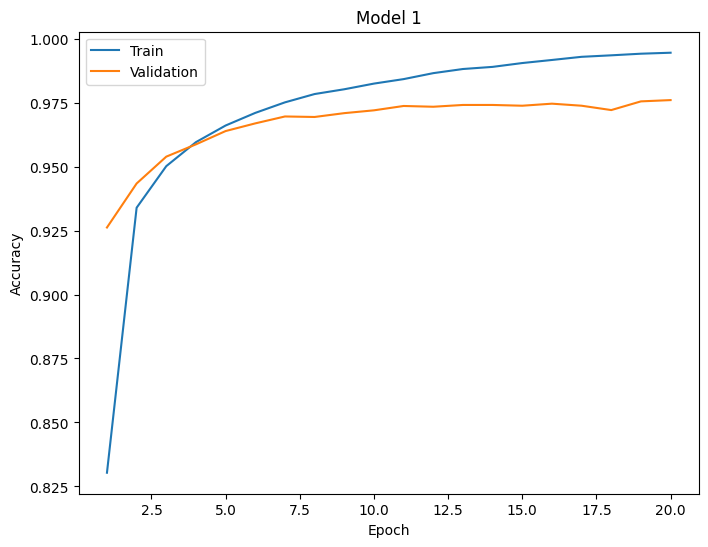

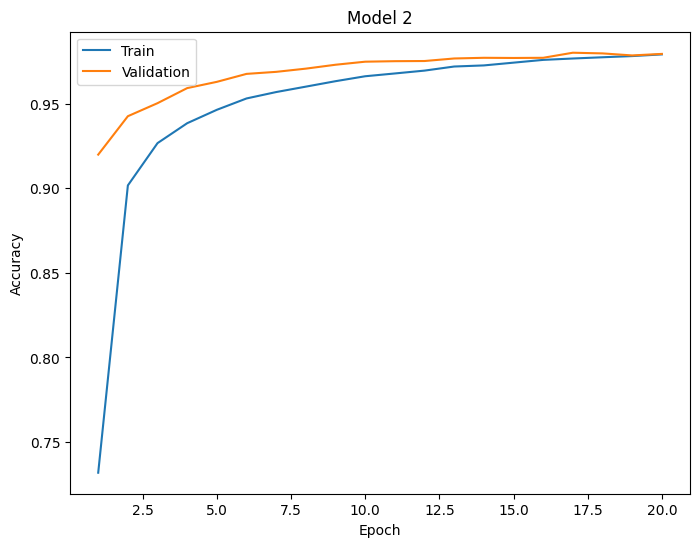

In [27]:
# Display our two model graphs.
model_mnist = get_model_mnist()
model_mnist.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_mnist_history = model_mnist.fit(x_train_normalized, y_train, epochs=20, batch_size=512, validation_data=(x_test_normalized, y_test), verbose=0)
plot_accuracy_curve(model_mnist_history, "Model 1")

best_model = get_model_mnist_dropout(dropout_rate=0.2)
best_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
best_model_history = best_model.fit(x_train_normalized, y_train, epochs=20, batch_size=512, validation_data=(x_test_normalized, y_test), verbose=0)
plot_accuracy_curve(best_model_history, "Model 2")

We can see our first model is better on the train data rather than on the test data, instead of our second model which is good for the test data and the train data. So the second model generalizes more than the first, the first may probably be overfitting to provide such results. So the dropout value is usefull because if stops the overfitting on the train data and oblige the model to more generalize and be better on the test data.

## Questions

* Avez-vous remarqué un gain de performance sur la base de test à l’aide des couches de dropout ? Si oui, à partir de combien de pourcentage ?
* Quel est l’avantage du dropout dans le cadre de l’apprentissage d’un modèle ?

Dropout acts as regularization by preventing the model from becoming overly reliant on specific activations, which can be beneficial in complex models.  

The optimal dropout percentage for ur use case of the digits was 0.1 based on the previous analysis.  

The advantage of dropout in model training lies in its ability to enhance generalization by reducing overfitting. By discouraging the model from relying too much on specific activations, dropout promotes a more robust and generalizable representation of the data, improving the results on the test dataset.